# Machine Learning Model Implementations
This file includes machine learning model implementations and optimization steps.
The models used in order is as follows:
1. KNN classifier
2. ...


### Import Packages and Load Dataset

Labels come from 2 different PSG systems: Remlogic and Somnomedics. Sleep stage labels are as follows:

0 = Awake = SLEEP-S0 \
1 = REM   = SLEEP-REM \
2 = Light = SLEEP-S1 and  SLEEP-S2 \
3 = Deep  = SLEEP-S3 

EMFIT is the piezoelectric mat and Somnofy is the radar.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

import numpy as np
from helpers import *
from plot import *

In [2]:
subjectID = PARTICIPANT_IDS[2]
sleep_stages, nan_counts = impute_data(subjectID)
print(nan_counts)

(0, 0, 0)


In [3]:
labels = sleep_stages["sleep_stage_num_psg"]
features = sleep_stages.drop(columns="sleep_stage_num_psg")
size = sleep_stages.shape[0]
divide_ind = int(size*.7)

In [4]:
print(accuracy_score(sleep_stages["sleep_stage_num_somnofy"][:divide_ind], labels[:divide_ind]))
print(accuracy_score(sleep_stages["sleep_stage_num_emfit"][:divide_ind], labels[:divide_ind]))

0.6440677966101694
0.1585956416464891


<AxesSubplot:xlabel='timestamp_local'>

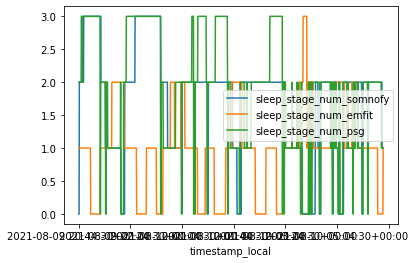

In [5]:
sleep_stages.plot()

### KNN Classifier

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(features[:divide_ind], labels[:divide_ind])

KNeighborsClassifier(n_neighbors=7)

In [7]:
preds = knn_classifier.predict(features[divide_ind:])

0.6581920903954802
[[ 39   0  22   0]
 [  7  51  18   0]
 [ 11  46 143   0]
 [  0   3  14   0]]


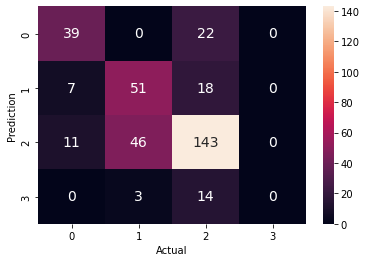

              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66        61
         1.0       0.51      0.67      0.58        76
         2.0       0.73      0.71      0.72       200
         3.0       0.00      0.00      0.00        17

    accuracy                           0.66       354
   macro avg       0.48      0.51      0.49       354
weighted avg       0.64      0.66      0.65       354



/Users/elifkurtay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elifkurtay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elifkurtay/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Accuracy score 
print(accuracy_score(preds, labels[divide_ind:]))

# Confusion Matrix and Classification Report 
plot_conf_matrix(preds, labels[divide_ind:])
print(classification_report(preds, labels[divide_ind:]))